In [1]:
import numpy as np
import os, cv2
import re, random
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf


In [5]:
data = np.load('../X_y_clean.npz')
X = data['X']
y = data['y']


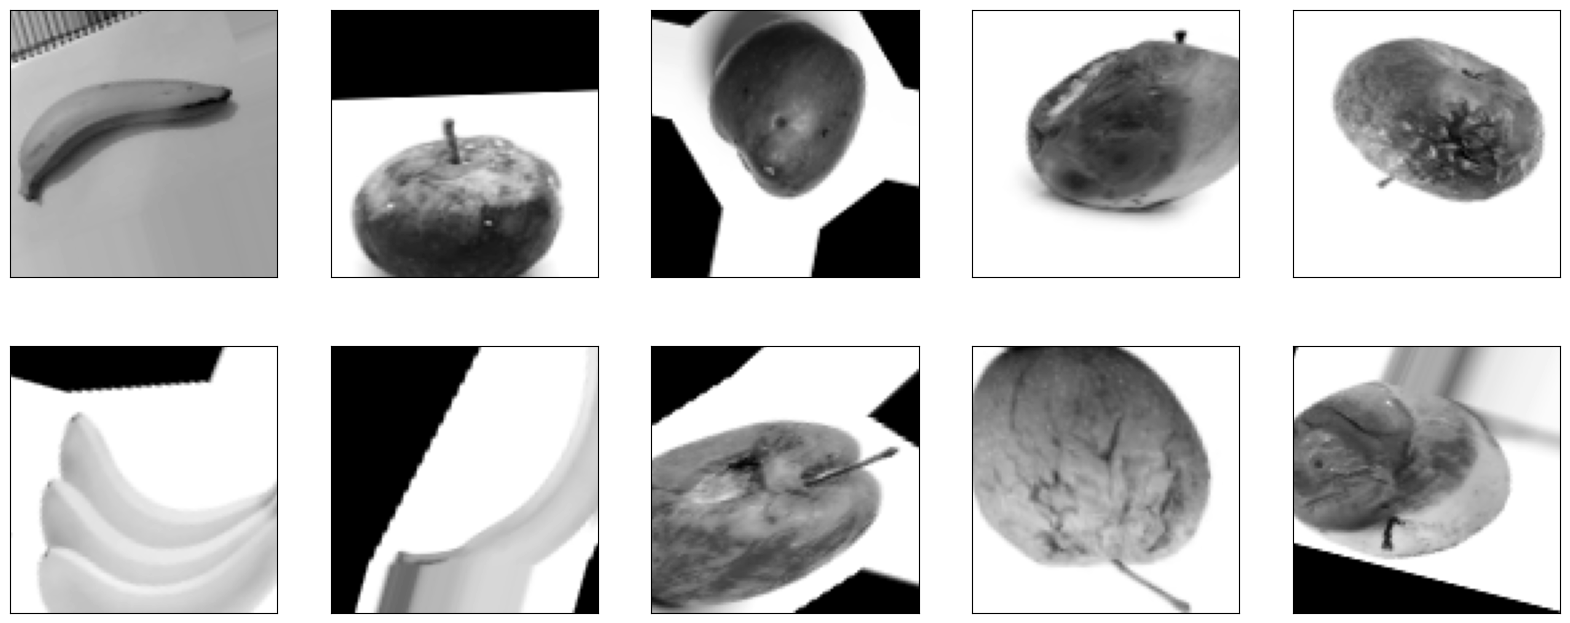

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=15,
    zoom_range=[0.7, 1.4],
    horizontal_flip=True,
    vertical_flip=True
)


datagen.fit(X)

plt.figure(figsize=(20,8))

for imagen, etiqueta in datagen.flow(X, y, batch_size=10, shuffle=False):
  for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i].reshape(100, 100), cmap="gray")
  break

In [ ]:
train_size = int(len(X) * 0.85)

X_train = X[:train_size]
X_test = X[train_size:]

y_train = y[:train_size]
y_test = y[train_size:]

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

In [ ]:
np.savez('../train_test_data.npz', 
         X_train=X_train, 
         X_test=X_test, 
         y_train=y_train, 
         y_test=y_test)


"""data = np.load('data/train_test_data.npz')
X_train = data['X_train']
X_test = data['X_test']
y_train = data['y_train']
y_test = data['y_test']"""